# Machine Learning with scikit-learn

## Hand-written digit recognition
Load hand-written digit images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
digits.images[100]     

(1797, 8, 8)


array([[  0.,   0.,   0.,   2.,  13.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   8.,  15.,   0.,   0.,   0.],
       [  0.,   0.,   5.,  16.,   5.,   2.,   0.,   0.],
       [  0.,   0.,  15.,  12.,   1.,  16.,   4.,   0.],
       [  0.,   4.,  16.,   2.,   9.,  16.,   8.,   0.],
       [  0.,   0.,  10.,  14.,  16.,  16.,   4.,   0.],
       [  0.,   0.,   0.,   0.,  13.,   8.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  13.,   6.,   0.,   0.]])

1797개의 이미지 샘플이 들어 있다. Digit 이미지는 8x8 matrix로 표현되고 값들은 gray level이다.

100번째 이미지를 보면,

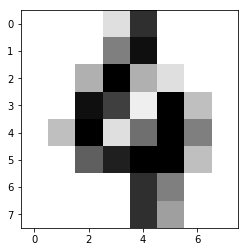

labeled: 4


In [3]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)
plt.show()
print('labeled:', digits.target[100])

##  Prepare data

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # flatten images
print('(samples, features):', data.shape)

(samples, features): (1797, 64)


In [5]:
n_train = round(n_samples * 0.8)
train_data, test_data = data[:n_train], data[n_train:]
train_target, test_target = digits.target[:n_train], digits.target[n_train:]
print('train set:', train_data.shape)
print('test set:', test_data.shape)

train set: (1438, 64)
test set: (359, 64)


## Training

In [6]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# train the classifier
classifier.fit(train_data, train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Prediction

In [7]:
# Now predict the value of the digit on the second half:
expected = test_target
predicted = classifier.predict(test_data)

In [8]:
import pandas as pd

df = pd.DataFrame({'expected': expected, 'predicted': predicted})
# df[df['expected'] != df['predicted']]
df[df.expected != df.predicted]   # show wrong answers

,expected,predicted
30,8,9
115,8,1
135,0,4
164,3,8
167,3,7
173,4,9
190,4,8
220,9,3
222,4,8
224,9,5


In [9]:
print("Classification report for classifier:\n%s\n" % (classifier))
print(metrics.classification_report(expected, predicted))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        35
          1       0.97      1.00      0.99        36
          2       1.00      1.00      1.00        34
          3       0.97      0.81      0.88        37
          4       0.97      0.92      0.94        37
          5       0.93      1.00      0.96        37
          6       1.00      1.00      1.00        37
          7       0.97      1.00      0.99        36
          8       0.84      0.94      0.89        33
          9       0.95      0.95      0.95        37

avg / total       0.96      0.96      0.96       359

Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 34  0 